<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Customer Loan Default</h1>
</div>

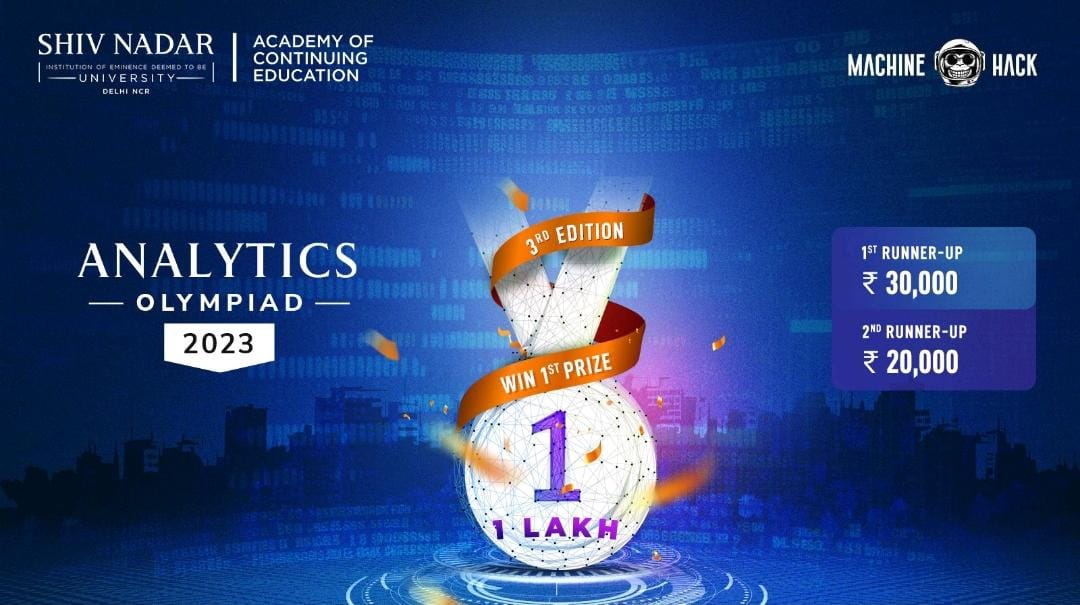

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** Analytics Olympiad MachineHack (24 Aug 2023 to 24 Sep 2023)
    
**Problem Statement:-** Build a machine learning-based approach to predict the likelihood of a customer defaulting on a loan

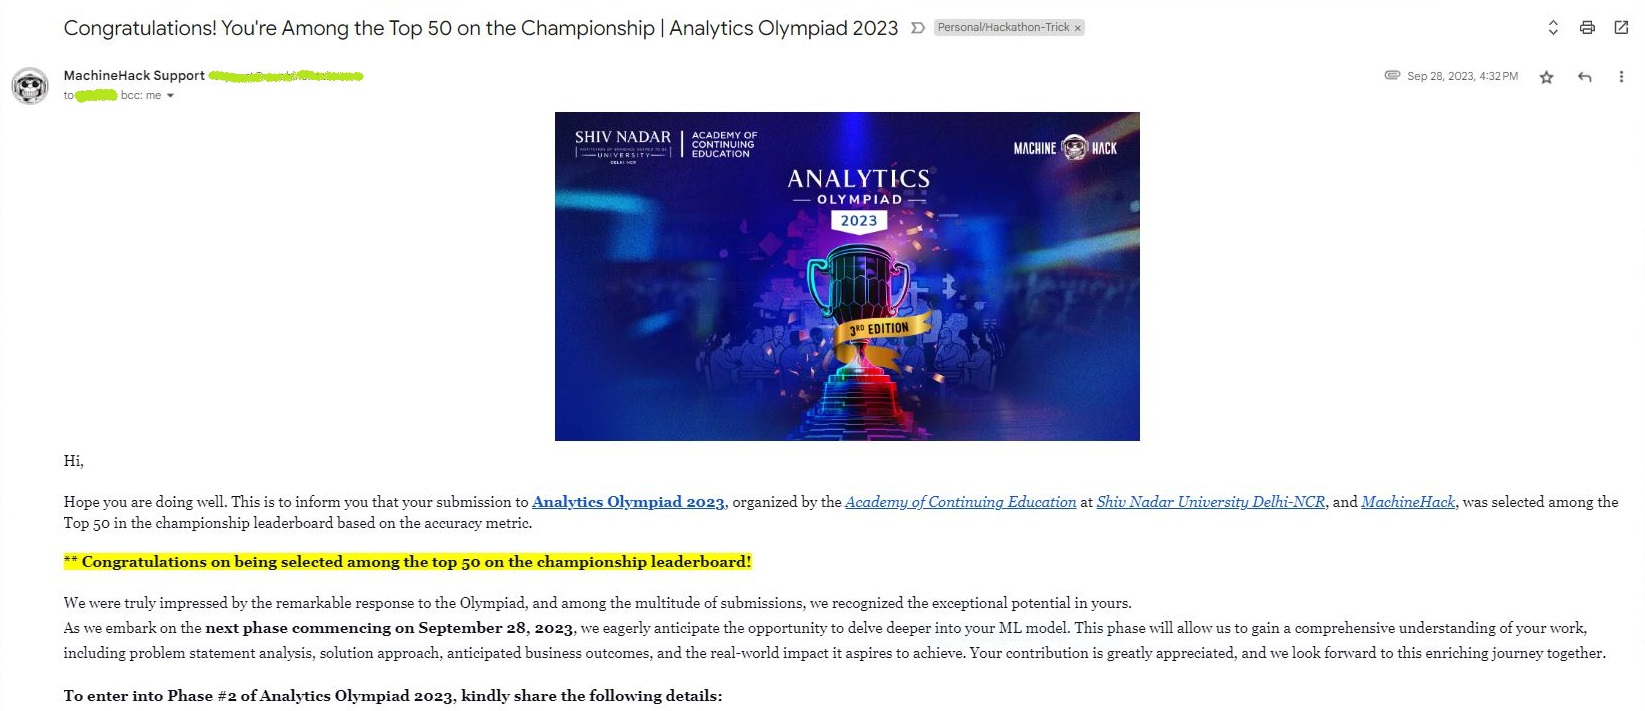

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [2]:
# Data manipulation
import scipy
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRFClassifier

# Model Evaluations
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score


# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    #fig=plt.figure(figsize=(16,4))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

C:\Users\1014070\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CatBoost version 1.2
NumPy version 1.24.3
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.3.0
xgboost version 1.7.6
lightgbm version 3.3.5


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable

In [3]:
train = pd.read_csv(r'C:\Users\1014070\Favorites\AB\MH\Shiv_Nadar_Aug23\train.csv')
test = pd.read_csv(r'C:\Users\1014070\Favorites\AB\MH\Shiv_Nadar_Aug23\test.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

In [3]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-nu

In [4]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

About Train Data:-

                            customer_id firstname lastname  record_number  \
0  4814dfa2-45a8-46b9-8102-98ecbbec2d2a     Navya     Vasa              7   
1  bb0abe41-cc89-4a1d-bb1c-48bd212ae00d      Azad  Warrior              5   
2  edfd1a62-05da-4cfd-b8ae-521f05f0fd5f      Piya      Jha              1   
3  3eaa4c2a-2316-48f4-b1b0-4aafe2286630      Rhea    Varma             11   
4  c9a73239-baae-40eb-8855-dab07767ea86     Sahil     Dave             12   

   days_since_opened  days_since_confirmed  primary_term  final_term  \
0                 10                     8            12          10   
1                 15                     6             7           6   
2                 15                    17             8           5   
3                  7                     2            11          13   
4                 14                     9             8          11   

   days_till_primary_close  days_till_final_close  loans_credit_limit  \
0          


---------------------------------------------------------------------------------------------------------------------


In [5]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

About Train Data:-

                                  customer_id firstname  lastname  \
1106669  c341a4e3-b4e2-455b-80b2-2be2655e6e85     Gatik     Boase   
1106670  29d8337c-13c9-4bb6-b794-762c386b1866    Jhanvi     Andra   
1106671  e3b374f2-d96e-4c8b-901a-be80a8bea3cc   Lakshit  Kulkarni   
1106672  b81e5b47-5c1b-4302-897c-2edc179d583f  Parinaaz   Chaudry   
1106673  62419cd3-7d86-4484-a684-93ace05cbbc0    Faiyaz      Mani   

         record_number  days_since_opened  days_since_confirmed  primary_term  \
1106669             19                  1                     5             8   
1106670             10                  5                     8             4   
1106671              3                  8                     7            13   
1106672              4                 10                     4            16   
1106673             12                  1                    10            10   

         final_term  days_till_primary_close  days_till_final_close  \
1106669

In [6]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_max_overdue_amount,loans_credit_cost_rate,loans_within_5_days,loans_within_5_to_30_days,loans_within_30_to_60_days,loans_within_60_to_90_days,loans_over_90_days,is_zero_loans_within_5_days,is_zero_loans_within_5_to_30_days,is_zero_loans_within_30_to_60_days,is_zero_loans_within_60_to_90_days,is_zero_loans_over_90_days,utilization,over_limit_count,max_over_limit_count,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count,encoded_payment_0,encoded_payment_1,encoded_payment_2,encoded_payment_3,encoded_payment_4,encoded_payment_5,encoded_payment_6,encoded_payment_7,encoded_payment_8,encoded_payment_9,encoded_payment_10,encoded_payment_11,encoded_payment_12,encoded_payment_13,encoded_payment_14,encoded_payment_15,encoded_payment_16,encoded_payment_17,encoded_payment_18,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
count,1106674,1106674,1106674,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1106674,1106674,1106674,1106674,1106674,1.106674e+06,1.106674e+06,1.106674e+06,1106674,1106674,1106674,1.069055e+06,1.070930e+06,1.072062e+06,1.069258e+06,1.070834e+06,1.071370e+06,1.068655e+06,1.071045e+06,1.071912e+06,1.070823e+06,1.071039e+06,1.071475e+06,1.068866e+06,1.071323e+06,1.069215e+06,1.070000e+06,1.071962e+06,1.069359e+06,1.071406e+06,1.070293e+06,1.069155e+06,1.069126e+06,1.069519e+06,1.070131e+06,1.070629e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06
unique,98376,208,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bd3685fc-3999-46bd-9010-efa26e442c1b,Lakshay,Kala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,6052,7286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017254,920306,1063517,1082855,1084174,NaN,NaN,NaN,826061,1028080,948807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.149727e+00,9.433967e+00,8.231377e+00,8.408147e+00,8.282763e+00,7.273099e+00,8.193988e+00,9.715922e+00,2.332612e+00,2.993031e+00,2.006561e+00,4.612366e+00,5.977587e+00,1.587196e+01,5.000895e+00,3.999911e+00,8.002274e+00,NaN,NaN,NaN,NaN,NaN,1.418643e+01,2.215318e+00,1.567052e+01,NaN,NaN,NaN,1.612985e-01,3.855079e-01,5.334990e-01,6.637565e-01,7.978557e-01,9.307690e-01,1.093367e+00,1.251324e+00,1.362826e+00,1.472394e+00,1.600249e+00,2.731106e+00,1.862825e+00,1.984420e+00,2.045192e+00,2.092179e+00,2.136375e+00,2.177469e+00,2.221507e+00,2.261796e+00,3.296505e+00,2.328069e+00,2.359353e+00,2.393023e+00,3.529236e+00,1.029407e+00,2.758336e+00,3.599215e+00,1.001480e+00,1.282708e-01,1.910454e-01
std,NaN,NaN,NaN,5.746106e+00,5.747728e+00,4.776280e+00,5.282007e+00,4.565543e+00,5.094787e+00,4.321941e+00,5.844795e+00,1.247430e+00,6.411320e-01,2.772437e-01,3.253269e+00,3.656500e-01,1.181175e+00,6.234925e-02,1.638182e-02,1.213150e-01,NaN,NaN,NaN,NaN,NaN,4.030960e+00,8.553349e-01,4.001749e+00,NaN,NaN,NaN,6.233905e-01,9.388029e-01,1.096599e+00,1.201604e+00,1.287451e+00,1.354189e+00,1.414439e+00,1.452645e+00,1.469558

In [7]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_max_overdue_amount,loans_credit_cost_rate,loans_within_5_days,loans_within_5_to_30_days,loans_within_30_to_60_days,loans_within_60_to_90_days,loans_over_90_days,is_zero_loans_within_5_days,is_zero_loans_within_5_to_30_days,is_zero_loans_within_30_to_60_days,is_zero_loans_within_60_to_90_days,is_zero_loans_over_90_days,utilization,over_limit_count,max_over_limit_count,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count,encoded_payment_0,encoded_payment_1,encoded_payment_2,encoded_payment_3,encoded_payment_4,encoded_payment_5,encoded_payment_6,encoded_payment_7,encoded_payment_8,encoded_payment_9,encoded_payment_10,encoded_payment_11,encoded_payment_12,encoded_payment_13,encoded_payment_14,encoded_payment_15,encoded_payment_16,encoded_payment_17,encoded_payment_18,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency
count,474289,474289,474289,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289.000000,474289,474289,474289,474289,474289,474289.000000,474289.000000,474289.000000,474289,474289,474289,458297.000000,458668.000000,459311.000000,458068.000000,458761.000000,459257.000000,458067.000000,459064.000000,459325.000000,458736.000000,459001.000000,459428.000000,458041.000000,459216.000000,458036.000000,458625.000000,459365.000000,458153.000000,459429.000000,458580.000000,458035.000000,458386.000000,458579.00000,458777.000000,458908.000000,474289.000000,474289.000000,474289.000000,474289.000000
unique,97704,208,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,f5e2d17d-16d8-4ad2-86a5-eee27811c935,Purab,Kala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,2622,3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436177,394794,455797,464273,464726,NaN,NaN,NaN,354283,440803,407092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.158857,9.429103,8.244627,8.414821,8.272642,7.279222,8.204736,9.710535,2.329729,2.992034,2.006530,4.602270,5.977874,15.874450,5.000797,3.999937,8.002121,NaN,NaN,NaN,NaN,NaN,14.183656,2.214506,15.675521,NaN,NaN,NaN,0.161917,0.385806,0.531498,0.662845,0.795789,0.928861,1.092482,1.251266,1.363965,1.471217,1.599452,2.730924,1.861672,1.982089,2.044095,2.091700,2.135992,2.176718,2.221647,2.262318,3.297436,2.328782,2.36083,2.394734,3.528960,1.029859,2.757401,3.596527,1.001400
std,NaN,NaN,NaN,5.757169,5.748442,4.780351,5.282216,4.561479,5.103062,4.319350,5.845884,1.244149,0.639825,0.275562,3.244534,0.361129,1.161441,0.058438,0.013775,0.118391,NaN,NaN,NaN,NaN,NaN,4.038593,0.852494,3.995965,NaN,NaN,NaN,0.625263,0.939088,1.095415,1.201270,1.286055,1.353239,1.414159,1.452922,1.469945,1.477903,1.476816,1.464190,1.439463,1.404702,1.382245,1.363608,1.344164,1.324836,1.301458,1.278726,1.257742,1.237950,1.21678,1.192558,1.082126,0.294979,0.468427,1.014316,0.044497
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0

In [8]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum()
                                   ,train.isnull().sum()*100/len(train))
                               ,columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
customer_id,0,0.000000
firstname,0,0.000000
lastname,0,0.000000
record_number,0,0.000000
days_since_opened,0,0.000000
days_since_confirmed,0,0.000000
primary_term,0,0.000000
final_term,0,0.000000
days_till_primary_close,0,0.000000
days_till_final_close,0,0.000000


In [9]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum()
                                  ,test.isnull().sum()*100/len(test))
                              ,columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
customer_id,0,0.000000
firstname,0,0.000000
lastname,0,0.000000
record_number,0,0.000000
days_since_opened,0,0.000000
days_since_confirmed,0,0.000000
primary_term,0,0.000000
final_term,0,0.000000
days_till_primary_close,0,0.000000
days_till_final_close,0,0.000000


In [10]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,customer_id,98376,"[4814dfa2-45a8-46b9-8102-98ecbbec2d2a, bb0abe4..."
1,firstname,208,"[Navya, Azad, Piya, Rhea, Sahil, Lakshay, Yasm..."
2,lastname,450,"[Vasa, Warrior, Jha, Varma, Dave, Gour, Dhaliw..."
3,record_number,46,"[7, 5, 1, 11, 12, 10, 33, 8, 19, 3, 18, 4, 2, ..."
4,days_since_opened,20,"[10, 15, 7, 14, 11, 13, 6, 9, 5, 4, 1, 2, 0, 8..."
5,days_since_confirmed,18,"[8, 6, 17, 2, 9, 13, 5, 7, 0, 12, 4, 16, 1, 14..."
6,primary_term,18,"[12, 7, 8, 11, 14, 13, 9, 17, 4, 3, 6, 2, 1, 1..."
7,final_term,17,"[10, 6, 5, 13, 11, 7, 0, 12, 14, 15, 8, 16, 1,..."
8,days_till_primary_close,17,"[13, 9, 14, 6, 3, 8, 2, 16, 7, 1, 0, 4, 5, 11,..."
9,days_till_final_close,16,"[5, 1, 8, 13, 6, 12, 15, 14, 3, 11, 9, 0, 4, 2..."


In [11]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,customer_id,97704,"[1dffd171-010b-4773-894f-4095077b0e31, cf0e7f8..."
1,firstname,208,"[Aradhya, Anahita, Amani, Tushar, Jivika, Tris..."
2,lastname,450,"[Deep, Anand, Tak, Sodhi, Rana, Majumdar, Mann..."
3,record_number,45,"[14, 17, 7, 13, 21, 9, 10, 5, 11, 30, 15, 1, 8..."
4,days_since_opened,20,"[2, 3, 9, 14, 1, 19, 4, 18, 17, 10, 11, 7, 15,..."
5,days_since_confirmed,18,"[13, 6, 10, 4, 3, 0, 1, 11, 16, 9, 8, 2, 14, 1..."
6,primary_term,18,"[14, 0, 12, 16, 15, 6, 4, 13, 3, 11, 1, 7, 2, ..."
7,final_term,17,"[2, 1, 7, 11, 9, 8, 16, 3, 5, 15, 13, 6, 12, 0..."
8,days_till_primary_close,17,"[14, 0, 10, 6, 15, 7, 12, 5, 16, 2, 1, 9, 11, ..."
9,days_till_final_close,16,"[6, 4, 13, 2, 11, 15, 7, 3, 14, 1, 0, 5, 10, 9..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Imputation of Null Values in Train DataSet</h2>
</div>

In [4]:
# Calculate Feature Level Missing Percentage in Train dataset
missing_percentage = (train.isnull().sum() / len(train)) * 100; 
print("Feature wise missing percentage in train dataset:-\n\n",missing_percentage)
print('-------------'*9)
# Set "Threshold" for imputing the "Null_Values"
threshold = 2;
# Check Feature where Missing_Percentage is more than above "Threshold"
columns_with_high_missing = missing_percentage[missing_percentage > threshold].index.tolist()
print("Features Selcted for Imputaion:-\n",columns_with_high_missing)
print('-------------'*9)
for column in columns_with_high_missing:
    mode_value = train[column].mode()[0]  # Calculate the mode value for the column
    train[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode
print('-------------'*9)    
print("Check Null Values in Train dataset:-\n",train.isnull().sum())    
# Note:- All Features having missing values are of "Categorical" Type

Feature wise missing percentage in train dataset:-

 customer_id                           0.000000
firstname                             0.000000
lastname                              0.000000
record_number                         0.000000
days_since_opened                     0.000000
days_since_confirmed                  0.000000
primary_term                          0.000000
final_term                            0.000000
days_till_primary_close               0.000000
days_till_final_close                 0.000000
loans_credit_limit                    0.000000
loans_next_payment_summary            0.000000
loans_outstanding_balance             0.000000
loans_max_overdue_amount              0.000000
loans_credit_cost_rate                0.000000
loans_within_5_days                   0.000000
loans_within_5_to_30_days             0.000000
loans_within_30_to_60_days            0.000000
loans_within_60_to_90_days            0.000000
loans_over_90_days                    0.000000
is_zero

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Imputation of Null Values in Test DataSet</h2>
</div>

In [5]:
# Calculate Feature Level Missing Percentage in Test dataset
missing_percentage1 = (test.isnull().sum() / len(test)) * 100; 
print("Feature wise missing percentage in test dataset:-\n\n",missing_percentage1)
print('-------------'*9)
# Set "Threshold" for imputing the "Null_Values"
threshold = 2;
# Check Feature where Missing_Percentage is more than above "Threshold"
columns_with_high_missing1 = missing_percentage[missing_percentage > threshold].index.tolist()
print("Features Selcted for Imputaion from Train data:-\n",columns_with_high_missing1)
print('-------------'*9)
for column in columns_with_high_missing1:
    mode_value1 = test[column].mode()[0]  # Calculate the mode value for the column
    test[column].fillna(mode_value1, inplace=True)  # Fill missing values with the mode  
print('-------------'*9)    
print("Check Null Values in Test dataset:-\n",test.isnull().sum())    
# Note:- All Features having missing values are of "Categorical" Type

Feature wise missing percentage in test dataset:-

 customer_id                           0.000000
firstname                             0.000000
lastname                              0.000000
record_number                         0.000000
days_since_opened                     0.000000
days_since_confirmed                  0.000000
primary_term                          0.000000
final_term                            0.000000
days_till_primary_close               0.000000
days_till_final_close                 0.000000
loans_credit_limit                    0.000000
loans_next_payment_summary            0.000000
loans_outstanding_balance             0.000000
loans_max_overdue_amount              0.000000
loans_credit_cost_rate                0.000000
loans_within_5_days                   0.000000
loans_within_5_to_30_days             0.000000
loans_within_30_to_60_days            0.000000
loans_within_60_to_90_days            0.000000
loans_over_90_days                    0.000000
is_zero_

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [14]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Shape of Numerical Features in Train data is:-\n\n",num_cols_train.shape)
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Shape of Catagorical Features in Train data is:-\n\n",cat_cols_train.shape)
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols_train)
print('-------------'*9)

Shape of Numerical Features in Train data is:-

 (51,)
Numerical Columns in Train Data are :-


Index(['record_number', 'days_since_opened', 'days_since_confirmed',
       'primary_term', 'final_term', 'days_till_primary_close',
       'days_till_final_close', 'loans_credit_limit',
       'loans_next_payment_summary', 'loans_outstanding_balance',
       'loans_max_overdue_amount', 'loans_credit_cost_rate',
       'loans_within_5_days', 'loans_within_5_to_30_days',
       'loans_within_30_to_60_days', 'loans_within_60_to_90_days',
       'loans_over_90_days', 'utilization', 'over_limit_count',
       'max_over_limit_count', 'encoded_payment_0', 'encoded_payment_1',
       'encoded_payment_2', 'encoded_payment_3', 'encoded_payment_4',
       'encoded_payment_5', 'encoded_payment_6', 'encoded_payment_7',
       'encoded_payment_8', 'encoded_payment_9', 'encoded_payment_10',
       'encoded_payment_11', 'encoded_payment_12', 'encoded_payment_13',
       'encoded_payment_14', 'encoded_payme

Checking distribution of 1st target variable i.e. Primary_Close_Flag


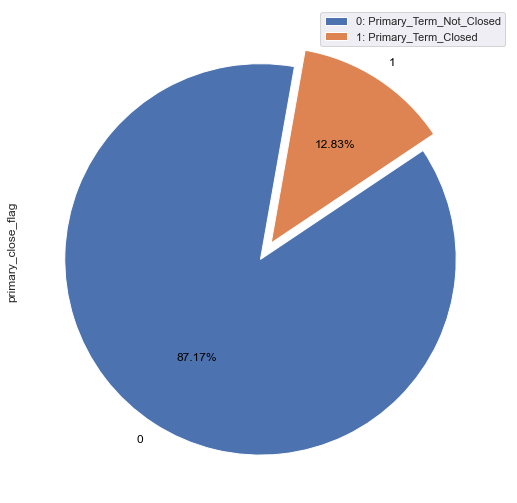

In [15]:
# Check the distribution of Target_Variable1 to see if it's a case of unbalanced class
print("Checking distribution of 1st target variable i.e. Primary_Close_Flag")
train.primary_close_flag.value_counts().plot(kind='pie', subplots=True
                                            , autopct='%1.2f%%', explode= (0.05, 0.05)
                                            , startangle=80, legend=True, fontsize=12
                                            , figsize=(14,9), textprops={'color':"black"})
plt.legend(["0: Primary_Term_Not_Closed","1: Primary_Term_Closed"]);

Checking distribution of 2nd target variable i.e. Final_Close_Flag


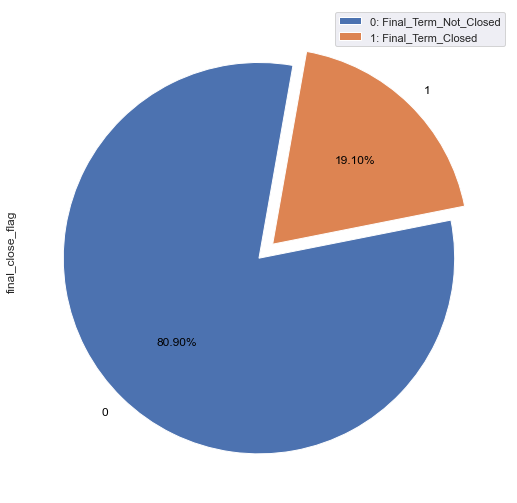

In [16]:
# Check the distribution of Target_Variable2 to see if it's a case of unbalanced class
print("Checking distribution of 2nd target variable i.e. Final_Close_Flag")
train.final_close_flag.value_counts().plot(kind='pie', subplots=True
                                            , autopct='%1.2f%%', explode= (0.05, 0.05)
                                            , startangle=80, legend=True, fontsize=12
                                            , figsize=(14,9), textprops={'color':"black"})
plt.legend(["0: Final_Term_Not_Closed","1: Final_Term_Closed"]);

In [17]:
# Calculate Class_Weight of Target_Variable
y_original1 = train['primary_close_flag']
class_weights1 = compute_class_weight(class_weight='balanced', classes=np.unique(y_original1), y=y_original1)
print("Class Weights of 1st Target Variable i.e. Primary_Close_Flag:", class_weights1)
print('-------------'*9)

y_original2 = train['final_close_flag']
class_weights2 = compute_class_weight(class_weight='balanced', classes=np.unique(y_original2), y=y_original2)
print("Class Weights of 2nd Target Variable i.e. Final_Close_Flag:", class_weights2)
print('-------------'*9)

Class Weights of 1st Target Variable i.e. Primary_Close_Flag: [0.57357264 3.89800217]
---------------------------------------------------------------------------------------------------------------------
Class Weights of 2nd Target Variable i.e. Final_Close_Flag: [0.61808167 2.61717867]
---------------------------------------------------------------------------------------------------------------------


In [18]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "record_number" :9382

Lower Limit in "record_number" : -7.0

Upper Limit in "record_number" : 25.0

Inter Quartile Range of "record_number" : 8.0 


Number of outliers in "days_since_opened" :0

Lower Limit in "days_since_opened" : -8.5

Upper Limit in "days_since_opened" : 27.5

Inter Quartile Range of "days_since_opened" : 9.0 


Number of outliers in "days_since_confirmed" :0

Lower Limit in "days_since_confirmed" : -8.0

Upper Limit in "days_since_confirmed" : 24.0

Inter Quartile Range of "days_since_confirmed" : 8.0 


Number of outliers in "primary_term" :0

Lower Limit in "primary_term" : -11.0

Upper Limit in "primary_term" : 29.0

Inter Quartile Range of "primary_term" : 10.0 


Number of outliers in "final_term" :0

Lower Limit in "final_term" : -5.5

Upper Limit in "final_term" : 22.5

Inter Quartile Range of "final_term" : 7.0 


Number of outliers in "days_till_primary_close" :0

Lower Limit in "days_till_primary_close" : -13.0

Upper Limit in "day


Number of outliers in "encoded_payment_23" :221732

Lower Limit in "encoded_payment_23" : 3.0

Upper Limit in "encoded_payment_23" : 3.0

Inter Quartile Range of "encoded_payment_23" : 0.0 


Number of outliers in "encoded_payment_24" :172001

Lower Limit in "encoded_payment_24" : 4.0

Upper Limit in "encoded_payment_24" : 4.0

Inter Quartile Range of "encoded_payment_24" : 0.0 


Number of outliers in "encoded_loans_account_holder_type" :12248

Lower Limit in "encoded_loans_account_holder_type" : 1.0

Upper Limit in "encoded_loans_account_holder_type" : 1.0

Inter Quartile Range of "encoded_loans_account_holder_type" : 0.0 


Number of outliers in "encoded_loans_credit_status" :3062

Lower Limit in "encoded_loans_credit_status" : 0.5

Upper Limit in "encoded_loans_credit_status" : 4.5

Inter Quartile Range of "encoded_loans_credit_status" : 1.0 


Number of outliers in "encoded_loans_credit_type" :76759

Lower Limit in "encoded_loans_credit_type" : 1.5

Upper Limit in "encoded_loans_

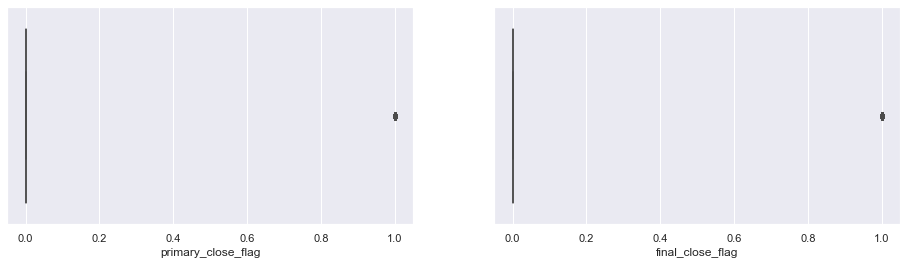

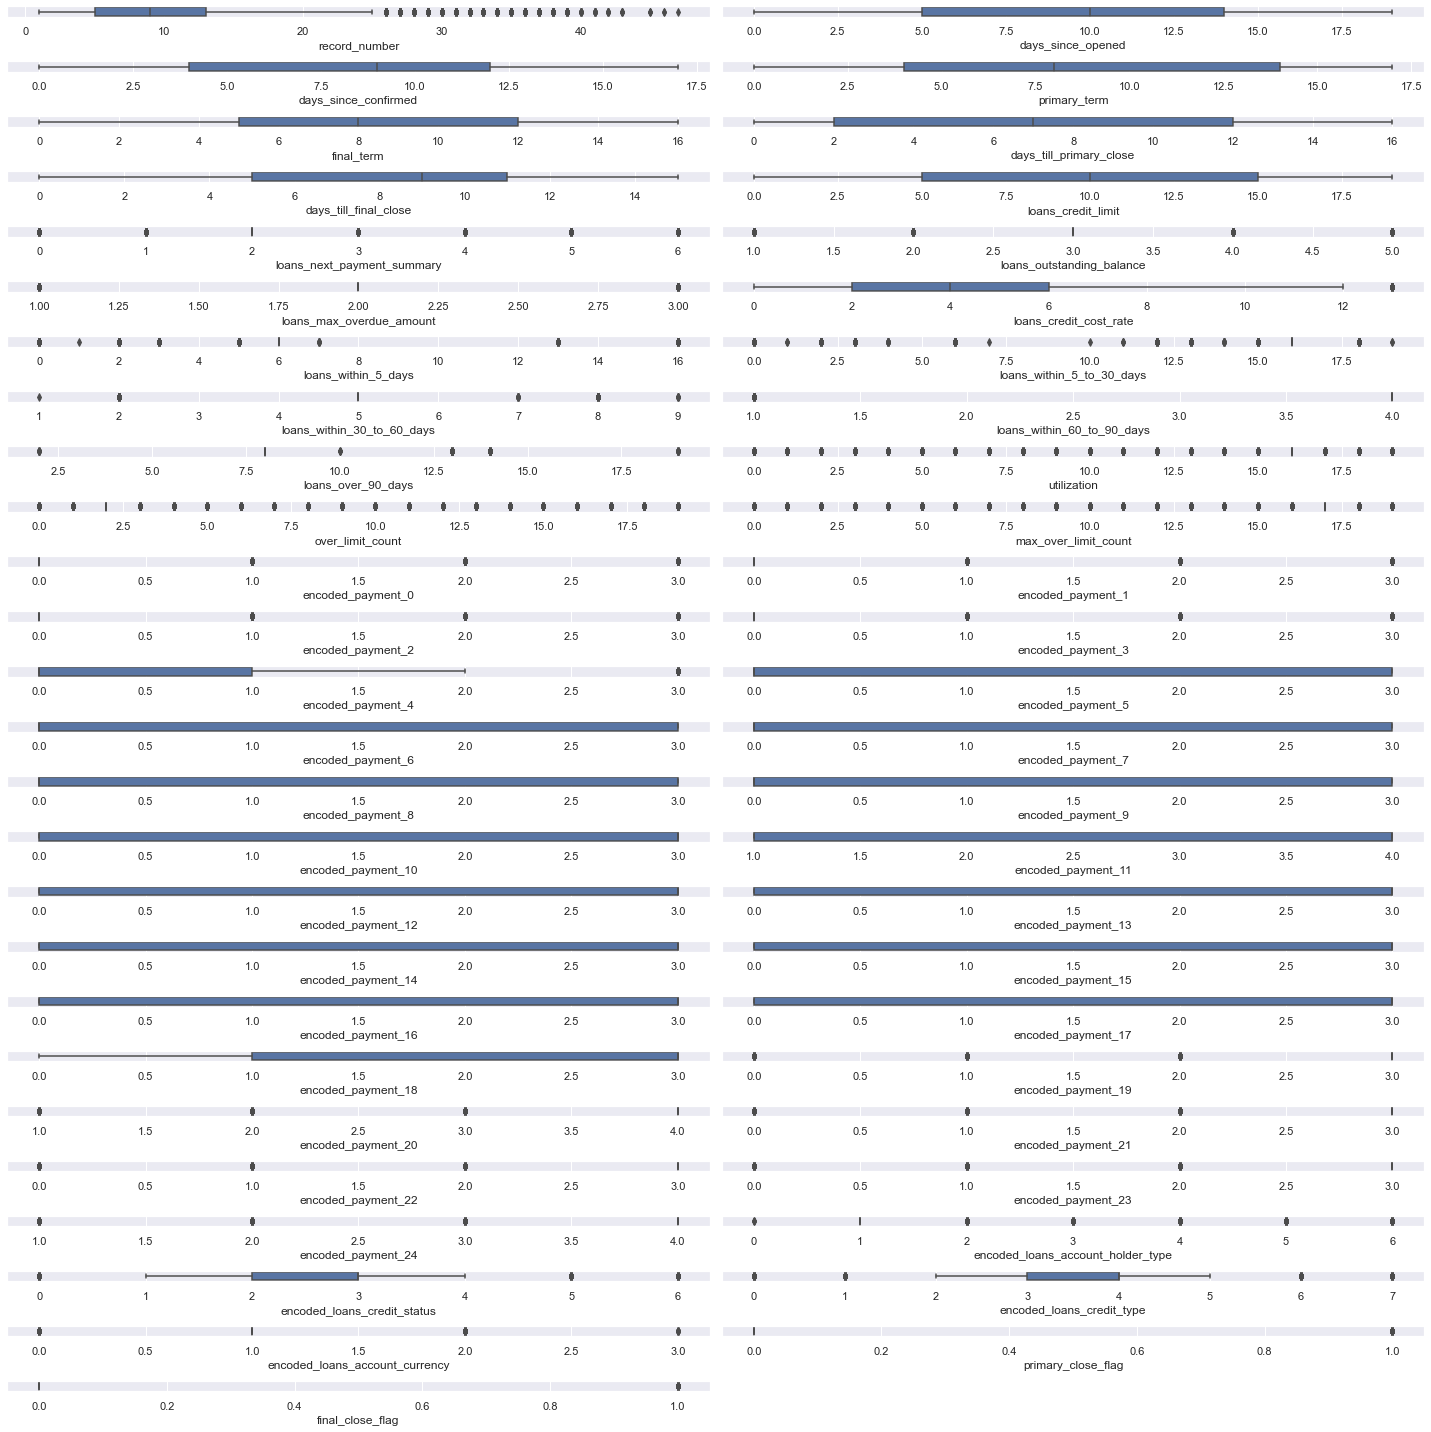

In [19]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable(Target_Variable1)
plt.figure(figsize=(16,4));
plt.subplot(121);
sns.boxplot(train['primary_close_flag']);
# Dependent Numerical Variable(Target_Variable2)
plt.subplot(122);
sns.boxplot(train['final_close_flag']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,26,2)


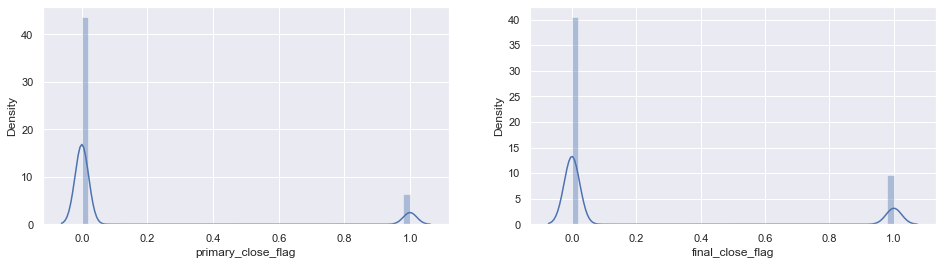

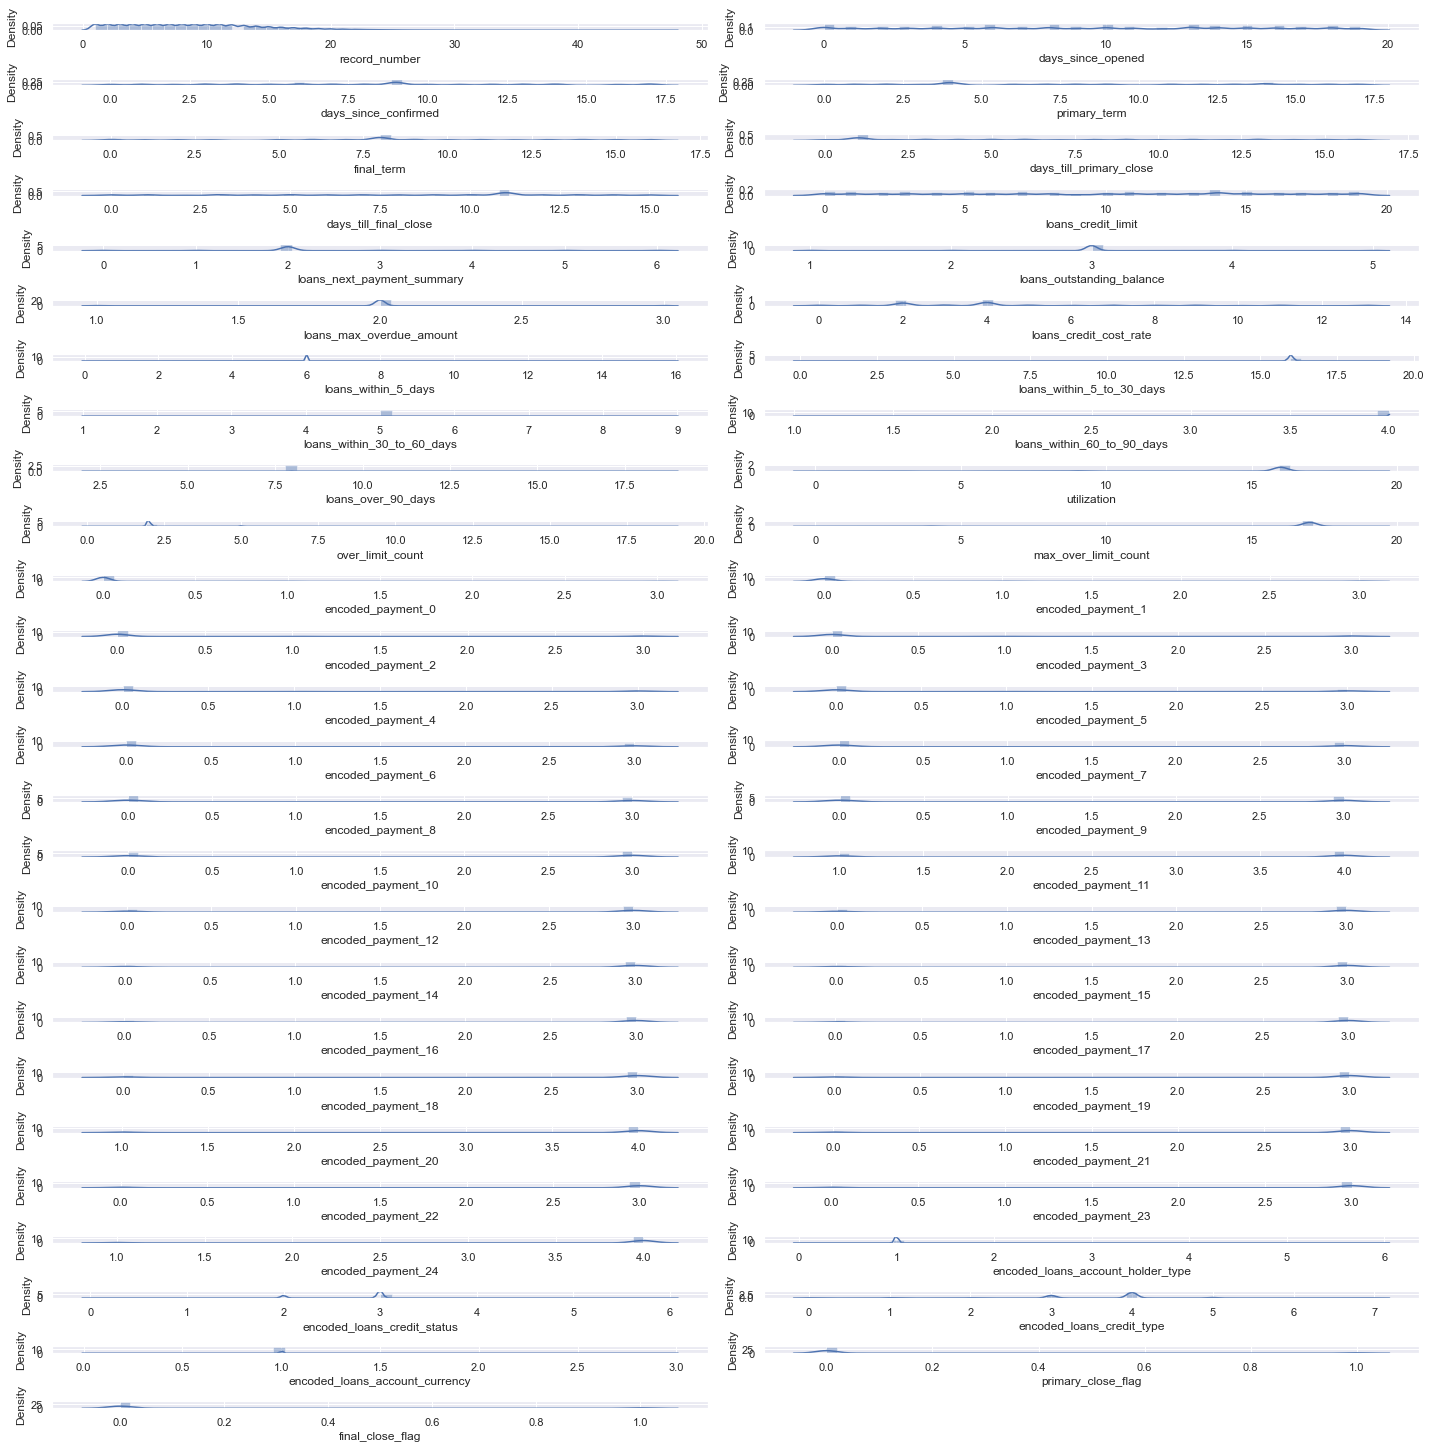

In [20]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable(Target_Variable1)
plt.figure(figsize=(16,4));
plt.subplot(121);
sns.distplot(train['primary_close_flag']);
# Dependent Numerical Variable(Target_Variable2)
plt.subplot(122);
sns.distplot(train['final_close_flag']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,26,2)

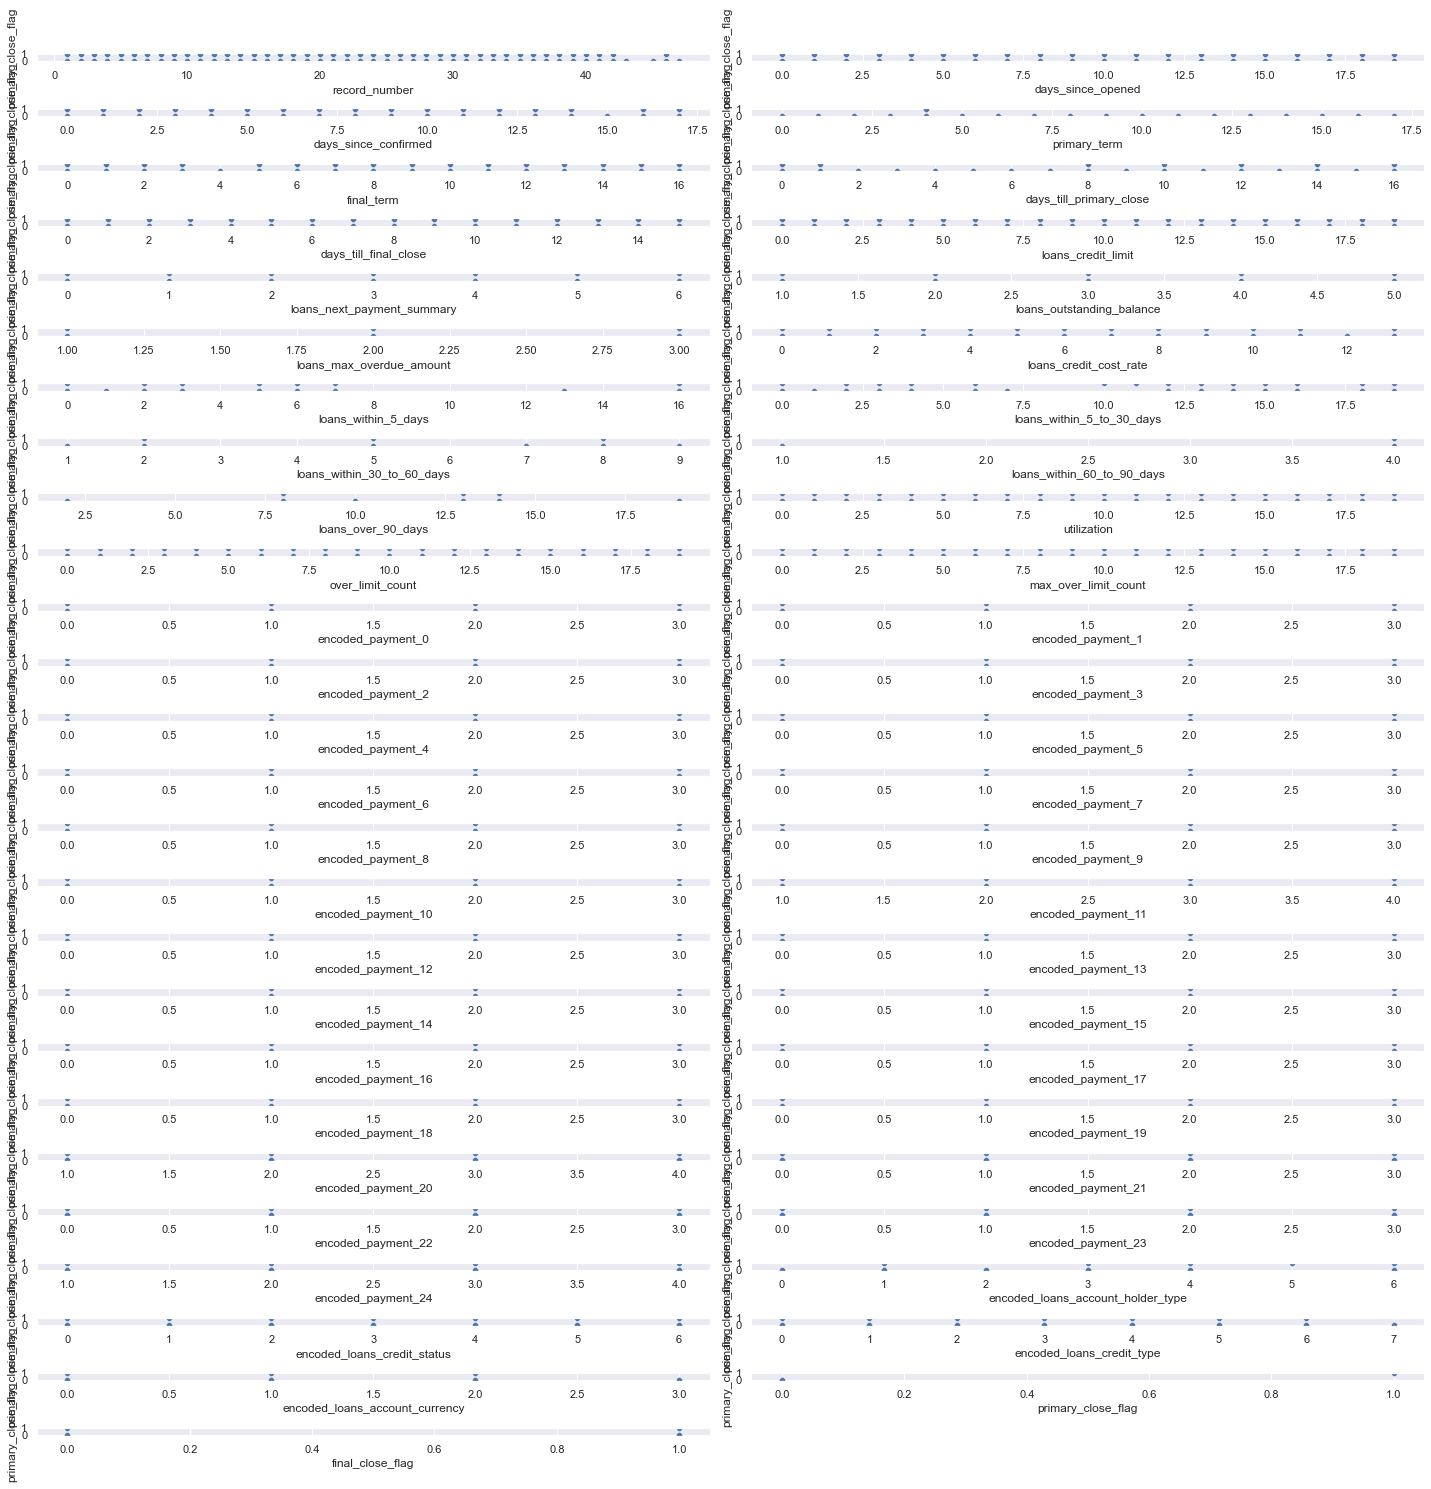

In [21]:
# Bivariate Analysis between Target Variable1 & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'primary_close_flag',26,2)

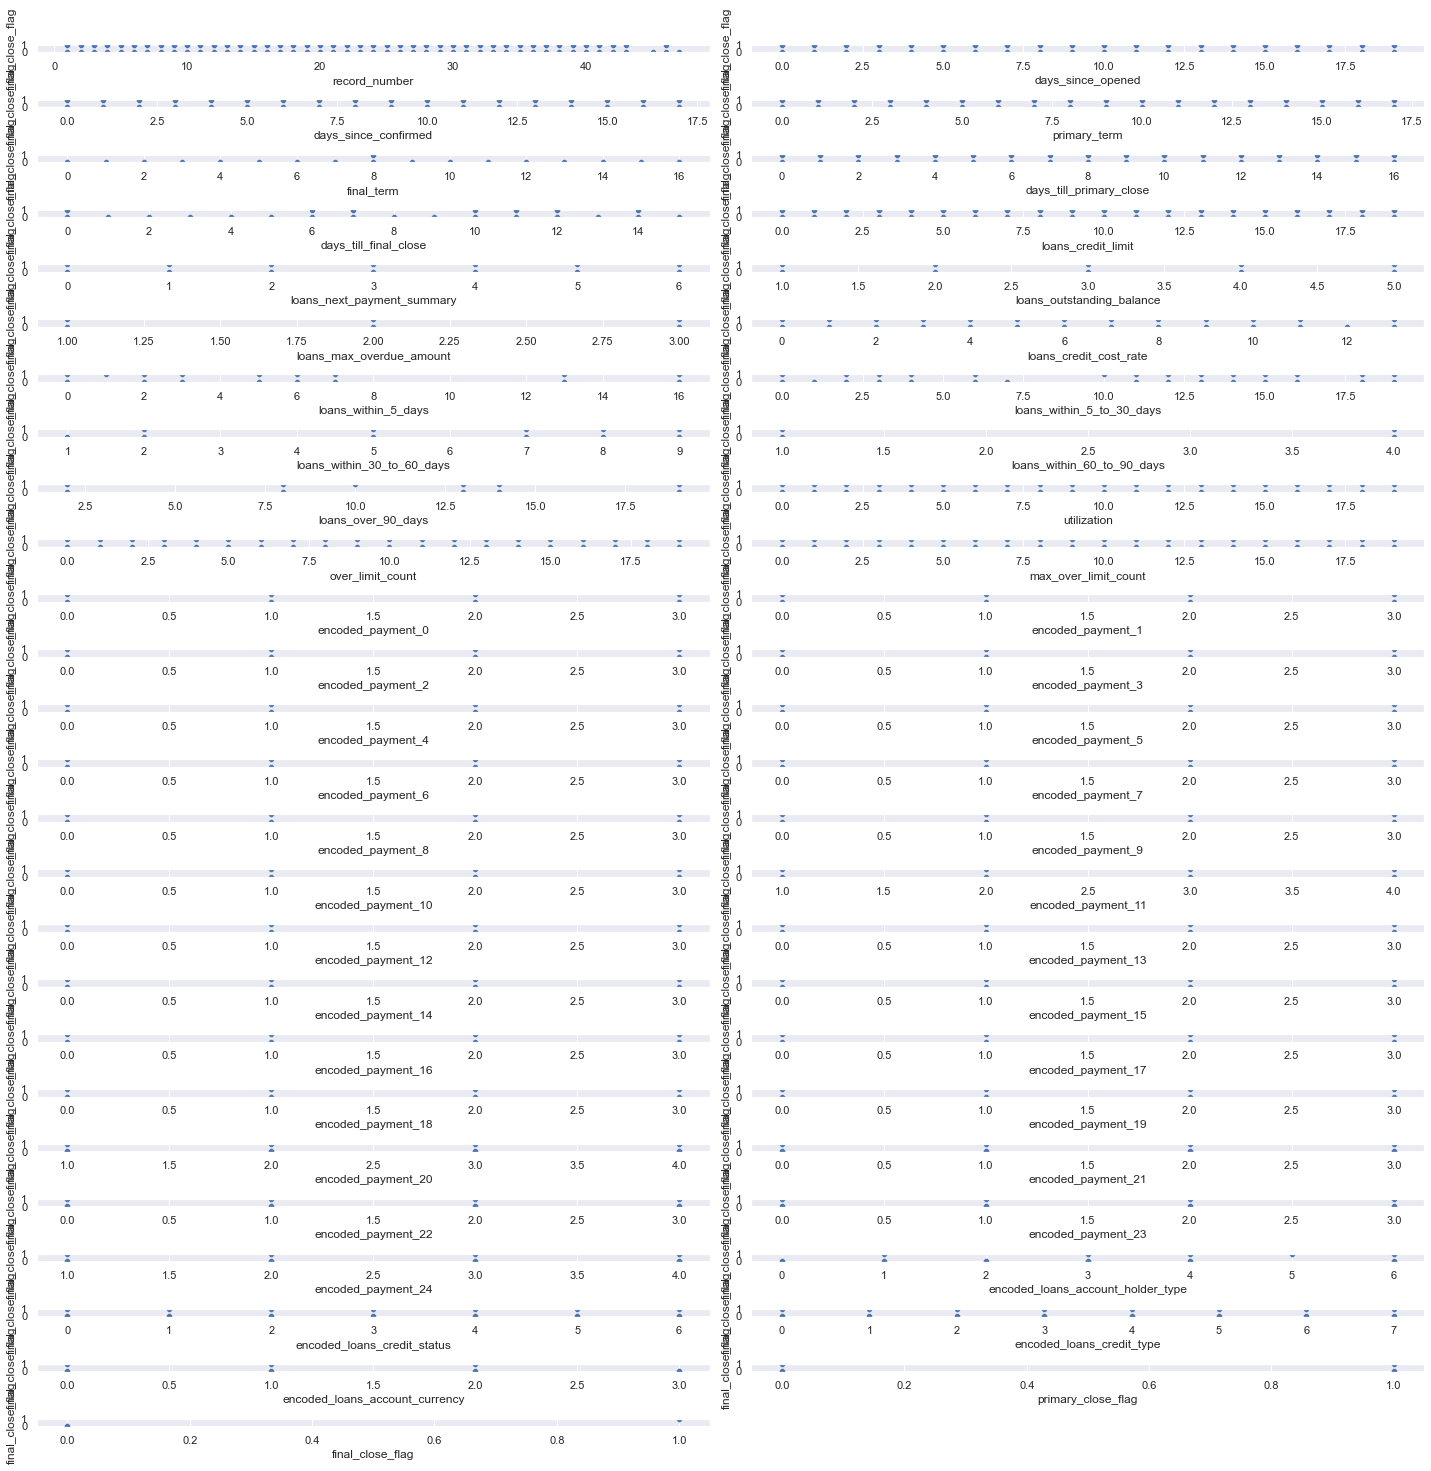

In [22]:
# Bivariate Analysis between Target Variable2 & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'final_close_flag',26,2)

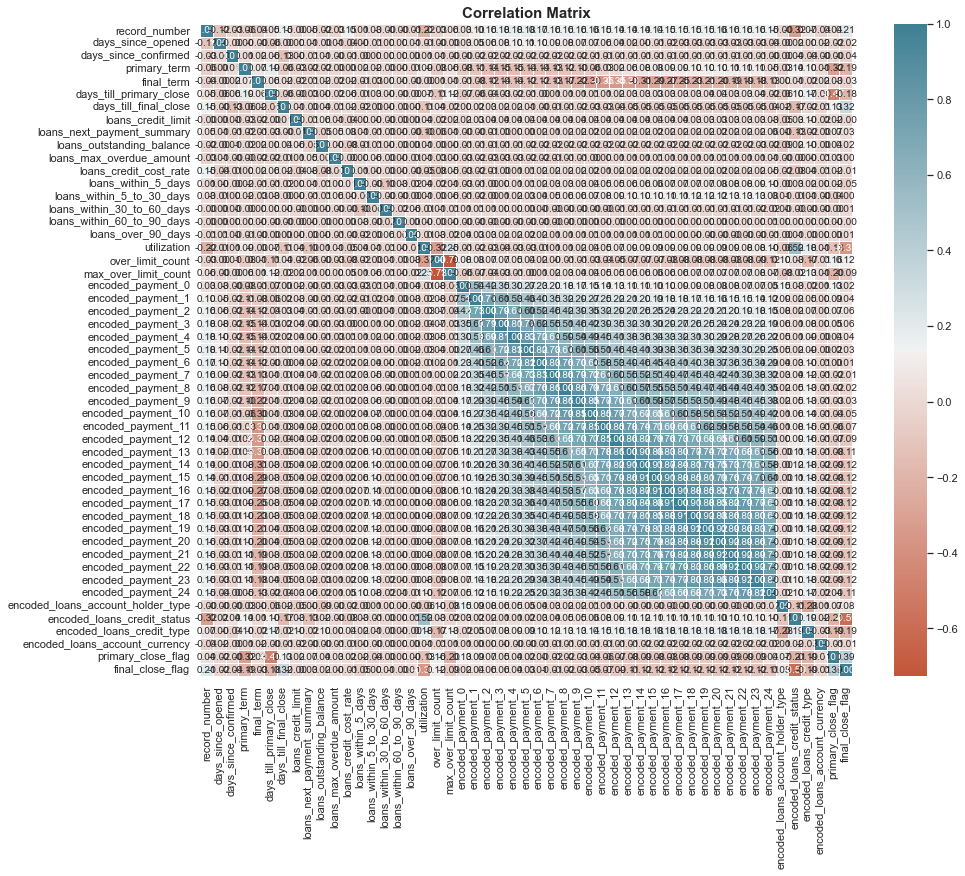

In [23]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Label Encoding of Train Dataset


In [6]:
Label_Encoder(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Label Encoding of Test Dataset


In [7]:
Label_Encoder(test)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Derived Feature</h2>
</div>

- Derived Feature for "Train" as well as "Test" Data


### <span style="color:black">Here are the definitions for the derived features:-</span>

#### <span style="color:red">a) **Payment Ratio**:-</span> 

A high payment ratio may suggest that a customer has a strong capacity to make timely payments, reducing the risk of default.

#### <span style="color:red">b) **Age of Credit**:-</span> 

This metric can reflect the stability and longevity of a customer's credit history.

#### <span style="color:red">c) **Overdue Ratio**:-</span> 

A high overdue ratio might signal a history of missed payments or delayed obligations.

#### <span style="color:red">d) **Credit Exposure**:-</span>  

This feature helps gauge the depth and duration of a customer's financial relationship with the lender.

#### <span style="color:red">e) **Total Number of Overdue Loans**:-</span>  

This indicates the overall count of loans that are currently overdue.

#### <span style="color:red">f) **Maximum Overdue Period**:-</span>  

Identifying the maximum overdue period helps pinpoint the time frame with the most significant number of overdue loans.

#### <span style="color:red">g) **Longest Consecutive Delinquency**:-</span>  

This feature highlights the longest continuous period during which delinquency occurred.

#### <span style="color:red">h) **Consistent Delinquency**:-</span>  

By evaluating if loans have consistently been overdue across all time frames, we can assess chronic financial instability.

#### <span style="color:red">i) **Indicator for Recent Delinquency**:-</span>  

This feature checks for any loans overdue within the last 5 days, which could indicate recent financial stress.

#### <span style="color:red">j) **Indicator for Long-term Delinquency**:-</span>  

It identifies loans that have been overdue for more than 90 days, suggesting more severe financial issues.

#### <span style="color:red">k) **Indicator for Zero Utilization and Zero Over-Limit Instances**:-</span> 

This feature assesses whether the customer has zero credit utilization and zero instances of exceeding the credit limit.

#### <span style="color:red">l) **Indicator for Zero Utilization and Zero Max Over-Limit Count**:-</span>  

Similar to the previous indicator, this feature checks for zero credit utilization and zero instances of reaching the maximum over-limit count.

In [8]:
train['payment_ratio'] = train['loans_next_payment_summary'] / train['loans_outstanding_balance']

train['age_of_credit'] = train['days_since_opened']

train['overdue_ratio'] = train['loans_max_overdue_amount'] / train['loans_outstanding_balance']

train['credit_exposure'] = train['loans_credit_limit'] * train['age_of_credit']

train['total_overdue_loans_count'] = (
                        train['loans_within_5_days'] + 
                        train['loans_within_5_to_30_days'] + 
                        train['loans_within_30_to_60_days'] + 
                        train['loans_within_60_to_90_days'] + 
                        train['loans_over_90_days'])

train['max_overdue_loan_count'] = train[['loans_within_5_days'
                                         ,'loans_within_5_to_30_days'
                                         ,'loans_within_30_to_60_days'
                                         ,'loans_within_60_to_90_days'
                                         ,'loans_over_90_days']].max(axis=1)

def cal_longest_consecutive_delinquency(*args):
    # Combine all input series into a single DataFrame
    df = pd.concat(args, axis=1)
    # Create a boolean DataFrame where True represents delinquency
    delinquent = df > 0
    # Initialize variables to track consecutive delinquency
    current_streak = 0
    longest_streak = 0
    for _, row in delinquent.iterrows():
        if row.all():  # If all columns are True (consecutive delinquency)
            current_streak += 1
            if current_streak > longest_streak:
                longest_streak = current_streak
        else:
            current_streak = 0

    return longest_streak

train['longest_consecutive_delinquency'] = cal_longest_consecutive_delinquency(
                                        train['is_zero_loans_within_5_days']
                                        ,train['is_zero_loans_within_5_to_30_days']
                                        ,train['is_zero_loans_within_30_to_60_days']
                                        ,train['is_zero_loans_within_60_to_90_days']
                                        ,train['is_zero_loans_over_90_days'])

train['is_consistent_delinquency'] = (train['is_zero_loans_within_5_days'] > 0) & \
                                   (train['is_zero_loans_within_5_to_30_days'] > 0) & \
                                   (train['is_zero_loans_within_30_to_60_days'] > 0) & \
                                   (train['is_zero_loans_within_60_to_90_days'] > 0) & \
                                   (train['is_zero_loans_over_90_days'] > 0)

train['is_consistent_delinquency'] = train['is_consistent_delinquency'].astype(int)

train['is_recent_delinquency'] = train['is_zero_loans_within_5_days'].apply(lambda x: 1 if x > 0 else 0)
train['is_recent_delinquency'] = train['is_recent_delinquency'].astype(int)

train['is_long_term_delinquency'] = train['is_zero_loans_over_90_days'].apply(lambda x: 1 if x > 0 else 0)
train['is_long_term_delinquency'] = train['is_long_term_delinquency'].astype(int)

train['is_zero_utilization_and_zero_over_limit'] = (train['is_zero_utilization'] == 1) & \
                                                (train['is_zero_over_limit_count'] == 1)
train['is_zero_utilization_and_zero_over_limit'] = train['is_zero_utilization_and_zero_over_limit'].astype(int)

train['is_zero_utilization_and_zero_max_over_limit'] = (train['is_zero_utilization'] == 1) & \
                                                        (train['is_zero_max_over_limit_count'] == 1)
train['is_zero_utilization_and_zero_max_over_limit'] = train['is_zero_utilization_and_zero_max_over_limit'].astype(int)

#----------------------------------------------------------------------------------------------------------------------------#

test['payment_ratio'] = test['loans_next_payment_summary'] / test['loans_outstanding_balance']
test['age_of_credit'] = test['days_since_opened']
test['overdue_ratio'] = test['loans_max_overdue_amount'] / test['loans_outstanding_balance']
test['credit_exposure'] = test['loans_credit_limit'] * test['age_of_credit']
test['total_overdue_loans_count'] = (
                                    test['loans_within_5_days'] + 
                                    test['loans_within_5_to_30_days'] + 
                                    test['loans_within_30_to_60_days'] + 
                                    test['loans_within_60_to_90_days'] + 
                                    test['loans_over_90_days'])

test['max_overdue_loan_count'] = test[['loans_within_5_days'
                                       ,'loans_within_5_to_30_days'
                                       ,'loans_within_30_to_60_days'
                                       ,'loans_within_60_to_90_days'
                                       ,'loans_over_90_days']].max(axis=1)

def cal_longest_consecutive_delinquency(*args):
    # Combine all input series into a single DataFrame
    df = pd.concat(args, axis=1)
    # Create a boolean DataFrame where True represents delinquency
    delinquent = df > 0
    # Initialize variables to track consecutive delinquency
    current_streak = 0
    longest_streak = 0
    for _, row in delinquent.iterrows():
        if row.all():  # If all columns are True (consecutive delinquency)
            current_streak += 1
            if current_streak > longest_streak:
                longest_streak = current_streak
        else:
            current_streak = 0

    return longest_streak

test['longest_consecutive_delinquency'] = cal_longest_consecutive_delinquency(
                                        test['is_zero_loans_within_5_days']
                                        ,test['is_zero_loans_within_5_to_30_days']
                                        ,test['is_zero_loans_within_30_to_60_days']
                                        ,test['is_zero_loans_within_60_to_90_days']
                                        ,test['is_zero_loans_over_90_days'])

test['is_consistent_delinquency'] = (test['is_zero_loans_within_5_days'] > 0) & \
                                   (test['is_zero_loans_within_5_to_30_days'] > 0) & \
                                   (test['is_zero_loans_within_30_to_60_days'] > 0) & \
                                   (test['is_zero_loans_within_60_to_90_days'] > 0) & \
                                   (test['is_zero_loans_over_90_days'] > 0)
test['is_consistent_delinquency'] = test['is_consistent_delinquency'].astype(int)

test['is_recent_delinquency'] = test['is_zero_loans_within_5_days'].apply(lambda x: 1 if x > 0 else 0)
test['is_recent_delinquency'] = test['is_recent_delinquency'].astype(int)

test['is_long_term_delinquency'] = test['is_zero_loans_over_90_days'].apply(lambda x: 1 if x > 0 else 0)
test['is_long_term_delinquency'] = test['is_long_term_delinquency'].astype(int)

test['is_zero_utilization_and_zero_over_limit'] = (test['is_zero_utilization'] == 1) & \
                                                (test['is_zero_over_limit_count'] == 1)
test['is_zero_utilization_and_zero_over_limit'] = test['is_zero_utilization_and_zero_over_limit'].astype(int)

test['is_zero_utilization_and_zero_max_over_limit'] = (test['is_zero_utilization'] == 1) & \
                                                    (test['is_zero_max_over_limit_count'] == 1)
test['is_zero_utilization_and_zero_max_over_limit'] = test['is_zero_utilization_and_zero_max_over_limit'].astype(int)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [9]:
train.isnull().sum()

customer_id                                    0
firstname                                      0
lastname                                       0
record_number                                  0
days_since_opened                              0
days_since_confirmed                           0
primary_term                                   0
final_term                                     0
days_till_primary_close                        0
days_till_final_close                          0
loans_credit_limit                             0
loans_next_payment_summary                     0
loans_outstanding_balance                      0
loans_max_overdue_amount                       0
loans_credit_cost_rate                         0
loans_within_5_days                            0
loans_within_5_to_30_days                      0
loans_within_30_to_60_days                     0
loans_within_60_to_90_days                     0
loans_over_90_days                             0
is_zero_loans_within

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [10]:
test.isnull().sum()

customer_id                                    0
firstname                                      0
lastname                                       0
record_number                                  0
days_since_opened                              0
days_since_confirmed                           0
primary_term                                   0
final_term                                     0
days_till_primary_close                        0
days_till_final_close                          0
loans_credit_limit                             0
loans_next_payment_summary                     0
loans_outstanding_balance                      0
loans_max_overdue_amount                       0
loans_credit_cost_rate                         0
loans_within_5_days                            0
loans_within_5_to_30_days                      0
loans_within_30_to_60_days                     0
loans_within_60_to_90_days                     0
loans_over_90_days                             0
is_zero_loans_within

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>

In [11]:
# Part A- Drop Features which imputed in the earlier step
train = train.drop(columns_with_high_missing,axis=1)
test = test.drop(columns_with_high_missing1,axis=1)

# Part B- Drop Additional Features
drop_columns = ['customer_id','firstname','lastname','over_limit_count'
                ,'is_zero_loans_within_60_to_90_days','is_zero_loans_over_90_days'
                ,'is_zero_utilization','utilization','is_zero_over_limit_count'
                ,'is_zero_max_over_limit_count','longest_consecutive_delinquency'
                ,'total_overdue_loans_count','payment_ratio'
                ,'max_overdue_loan_count','age_of_credit'
                ,'is_zero_utilization_and_zero_max_over_limit'
                ,'is_recent_delinquency']

train = train.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

print("Shape of Final Train Dataset used for Modeling:-\n\n",train.shape)
print('-------------'*9)
Final_Features = list(train.columns)
print("List of Features used for Model Building:-\n\n",Final_Features)
print('-------------'*9)
print("Shape of Final Test Dataset used for Modeling:-",test.shape)

Shape of Final Train Dataset used for Modeling:-

 (1106674, 32)
---------------------------------------------------------------------------------------------------------------------
List of Features used for Model Building:-

 ['record_number', 'days_since_opened', 'days_since_confirmed', 'primary_term', 'final_term', 'days_till_primary_close', 'days_till_final_close', 'loans_credit_limit', 'loans_next_payment_summary', 'loans_outstanding_balance', 'loans_max_overdue_amount', 'loans_credit_cost_rate', 'loans_within_5_days', 'loans_within_5_to_30_days', 'loans_within_30_to_60_days', 'loans_within_60_to_90_days', 'loans_over_90_days', 'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days', 'is_zero_loans_within_30_to_60_days', 'max_over_limit_count', 'encoded_loans_account_holder_type', 'encoded_loans_credit_status', 'encoded_loans_credit_type', 'encoded_loans_account_currency', 'primary_close_flag', 'final_close_flag', 'overdue_ratio', 'credit_exposure', 'is_consistent_deli

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Additional Data Visualization</h2>
</div>

- Visualize Clean Version of "Train" Data

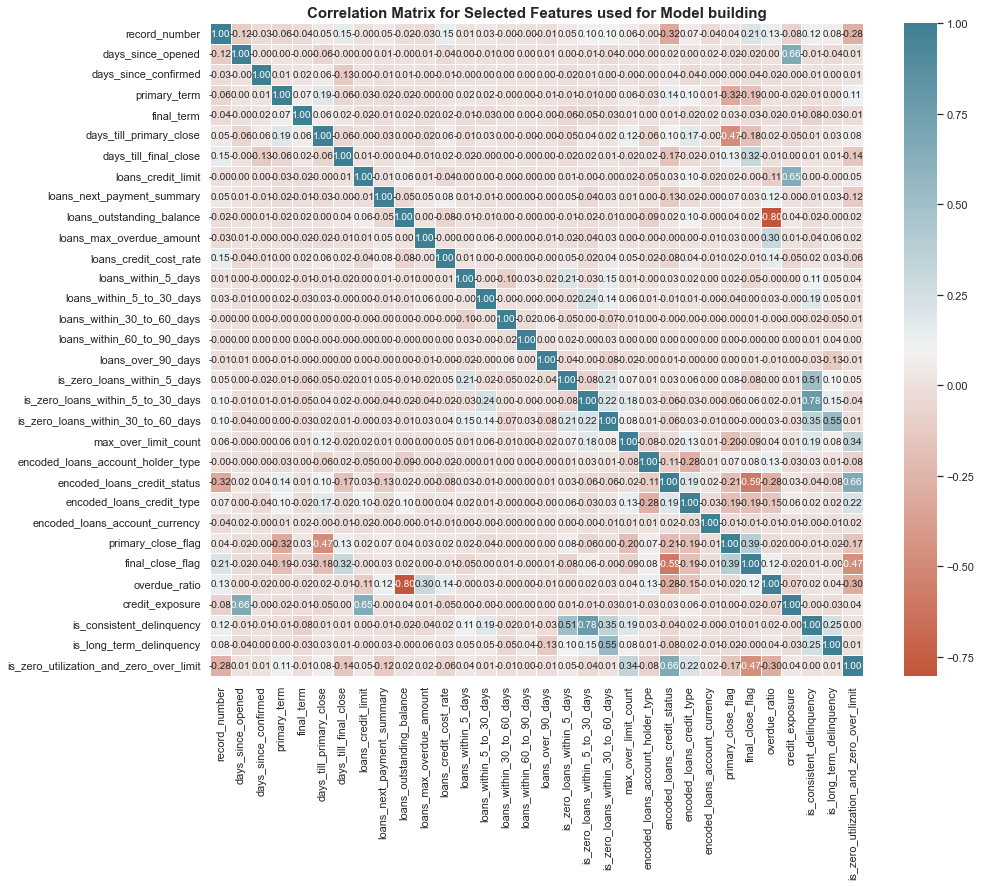

In [30]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix for Selected Features used for Model building', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 32 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   record_number                            1106674 non-null  int64  
 1   days_since_opened                        1106674 non-null  int64  
 2   days_since_confirmed                     1106674 non-null  int64  
 3   primary_term                             1106674 non-null  int64  
 4   final_term                               1106674 non-null  int64  
 5   days_till_primary_close                  1106674 non-null  int64  
 6   days_till_final_close                    1106674 non-null  int64  
 7   loans_credit_limit                       1106674 non-null  int64  
 8   loans_next_payment_summary               1106674 non-null  int64  
 9   loans_outstanding_balance                1106674 non-null  int64  
 10  loans_max_overdue_

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474289 entries, 0 to 474288
Data columns (total 30 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   record_number                            474289 non-null  int64  
 1   days_since_opened                        474289 non-null  int64  
 2   days_since_confirmed                     474289 non-null  int64  
 3   primary_term                             474289 non-null  int64  
 4   final_term                               474289 non-null  int64  
 5   days_till_primary_close                  474289 non-null  int64  
 6   days_till_final_close                    474289 non-null  int64  
 7   loans_credit_limit                       474289 non-null  int64  
 8   loans_next_payment_summary               474289 non-null  int64  
 9   loans_outstanding_balance                474289 non-null  int64  
 10  loans_max_overdue_amount        

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [14]:
scaler = StandardScaler()
X_train = train.drop(['primary_close_flag','final_close_flag'], axis=1)
X_train_scaled = scaler.fit_transform(X_train)
y_train_1 = train['primary_close_flag']
y_train_2 = train['final_close_flag']
test_scaled = scaler.fit_transform(test)
x = np.array(test_scaled) 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

#### * For Target_Variable1 (Primary_Close_Flag)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

In [15]:
model1 = LogisticRegression(random_state=0,class_weight='balanced')
model1.fit(X_train_scaled,y_train_1) 
print("Model1 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model1 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Gradient Boosting Classifier</h2>
</div>

In [16]:
model2 = GradientBoostingClassifier(random_state=0)
model2.fit(X_train_scaled,y_train_1)
print("Model2 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model2 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Quadratic Discriminant Analysis</h2>
</div>

In [17]:
model3 = QuadraticDiscriminantAnalysis()
model3.fit(X_train_scaled,y_train_1)
print("Model3 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model3 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- CatBoost Classifier</h2>
</div>

In [18]:
model4 = CatBoostClassifier(random_state=0,logging_level='Silent')
model4.fit(X_train_scaled,y_train_1)
print("Model4 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model4 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Light Gradient Boosted Machine(LGBM) Classifier</h2>
</div>

In [19]:
model5 = LGBMClassifier(random_state=0)
model5.fit(X_train_scaled,y_train_1)
print("Model5 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model5 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- XGB Classifier</h2>
</div>

In [20]:
model6 = XGBClassifier(random_state=0)
model6.fit(X_train_scaled,y_train_1)
print("Model6 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model6 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Histogram Gradient Boosting Classifier</h2>
</div>

In [21]:
model7 = HistGradientBoostingClassifier(random_state=0)
model7.fit(X_train_scaled,y_train_1)
print("Model7 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model7 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Random Forest Classifier</h2>
</div>

In [22]:
model8 = RandomForestClassifier(random_state=0)
model8.fit(X_train_scaled,y_train_1)
print("Model8 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model8 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Bagging Classifier</h2>
</div>

In [23]:
model9 = BaggingClassifier(n_estimators=1)
model9.fit(X_train_scaled,y_train_1)
print("Model9 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model9 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Linear Support Vector Classification</h2>
</div>

In [24]:
model10 = make_pipeline(StandardScaler(),LinearSVC())
model10.fit(X_train_scaled,y_train_1)
print("Model10 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model10 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Stochastic Gradient Descent Classifier</h2>
</div>

In [25]:
model11 = make_pipeline(StandardScaler(),SGDClassifier())
model11.fit(X_train_scaled,y_train_1)
print("Model11 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model11 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Linear Support Vector Classification (Generate Probability Estimates)</h2>
</div>

In [26]:
mm = make_pipeline(StandardScaler(),LinearSVC())
model12 = CalibratedClassifierCV(mm)
model12.fit(X_train_scaled,y_train_1)
print("Model12 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model12 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Stochastic Gradient Descent Classifier (Generate Probability Estimates)</h2>
</div>

In [27]:
ab = make_pipeline(StandardScaler(),SGDClassifier(loss = 'hinge'))
model13 = CalibratedClassifierCV(ab)
model13.fit(X_train_scaled,y_train_1)
print("Model13 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model13 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Multi Layer Perceptron Classifier</h2>
</div>

In [28]:
model14 = MLPClassifier(hidden_layer_sizes=(10, 10)
                        ,max_iter=1000
                        ,random_state=42)
model14.fit(X_train_scaled,y_train_1)
print("Model14 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model14 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Fitting Gradient Boosting Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [29]:
model15 = GradientBoostingClassifier(random_state=123,max_depth = 10
                                     ,n_estimators = 141
                                     ,learning_rate = 0.028413535583978154
                                     ,max_features = 0.9054517208905205
                                     ,subsample = 0.8804892514755251)
model15.fit(X_train_scaled,y_train_1)
print("Model15 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model15 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Gaussian Naïve Bayes Classifier</h2>
</div>

In [30]:
model16 = GaussianNB()
model16.fit(X_train_scaled,y_train_1)
print("Model16 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model16 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Decision Tree Classifier</h2>
</div>

In [31]:
model17 = DecisionTreeClassifier(random_state=0)
model17.fit(X_train_scaled,y_train_1)
print("Model17 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model17 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Extra Trees Classifier</h2>
</div>

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model18 = ExtraTreesClassifier(random_state=0)
model18.fit(X_train_scaled,y_train_1)
print("Model18 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model18 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- AdaBoost Classifier</h2>
</div>

In [34]:
model19 = AdaBoostClassifier(random_state=0)
model19.fit(X_train_scaled,y_train_1)
print("Model19 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model19 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 20- XGBRF Classifier</h2>
</div>

In [36]:
from xgboost import XGBRFClassifier
model20 = XGBRFClassifier(random_state=0)
model20.fit(X_train_scaled,y_train_1)
print("Model20 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model20 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 21- Fitting XGB Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [37]:
model21 = XGBClassifier(random_state=0,subsample = 0.8999999999999999
                        ,n_estimators = 750,min_child_weight = 7,max_depth = 10
                        ,learning_rate = 0.1, gamma = 0.2,colsample_bytree = 0.5
                        ,colsample_bylevel = 0.8999999999999999)
model21.fit(X_train_scaled,y_train_1)
print("Model21 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model21 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 22- AdaBoost with Decision Tree Classifier</h2>
</div>

In [38]:
model22 = AdaBoostClassifier(n_estimators=220
                             ,estimator = DecisionTreeClassifier(min_samples_leaf= 0.005
                                                                             ,min_samples_split = 0.001
                                                                             ,splitter = 'best')) 
model22.fit(X_train_scaled,y_train_1)
print("Model22 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model22 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 23- Fitting CatBoost Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [39]:
model23 = CatBoostClassifier(random_state=0,logging_level='Silent'
                             ,depth = 10,iterations = 300
                             ,learning_rate = 0.04)
model23.fit(X_train_scaled,y_train_1)
print("Model23 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model23 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 24- Fitting Histogram Gradient Boosting Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [40]:
model24 = HistGradientBoostingClassifier(random_state=0,l2_regularization = 0.1
                                         ,learning_rate = 0.9
                                         ,max_depth = 5, max_iter = 100
                                         ,min_samples_leaf = 32)
model24.fit(X_train_scaled,y_train_1)
print("Model24 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model24 have been successfully trained & Ready for making predictions of Target_Variable1!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 25- Voting Classifier</h2>
</div>

In [41]:
clf1 = model15
clf2 = model6
model25 = VotingClassifier(estimators=[('Model1', clf1)
                                       , ('Model2', clf2)]
                           , voting='soft')

model25.fit(X_train_scaled,y_train_1)
print("Model25 have been successfully trained & Ready for making predictions of Target_Variable1!\n\n")

Model25 have been successfully trained & Ready for making predictions of Target_Variable1!




#### * For Target_Variable2 (Final_Close_Flag)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

In [42]:
model_2_1 = LogisticRegression(random_state=0,class_weight='balanced')
model_2_1.fit(X_train_scaled,y_train_2) 
print("Model1 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model1 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Gradient Boosting Classifier</h2>
</div>

In [43]:
model_2_2 = GradientBoostingClassifier(random_state=0)
model_2_2.fit(X_train_scaled,y_train_2)
print("Model2 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model2 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Quadratic Discriminant Analysis</h2>
</div>

In [44]:
model_2_3 = QuadraticDiscriminantAnalysis()
model_2_3.fit(X_train_scaled,y_train_2)
print("Model3 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model3 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- CatBoost Classifier</h2>
</div>

In [45]:
model_2_4 = CatBoostClassifier(random_state=0,logging_level='Silent')
model_2_4.fit(X_train_scaled,y_train_2)
print("Model4 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model4 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Light Gradient Boosted Machine(LGBM) Classifier</h2>
</div>

In [46]:
model_2_5 = LGBMClassifier(random_state=0)
model_2_5.fit(X_train_scaled,y_train_2)
print("Model5 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model5 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- XGB Classifier</h2>
</div>

In [47]:
model_2_6 = XGBClassifier(random_state=0)
model_2_6.fit(X_train_scaled,y_train_2)
print("Model6 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model6 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Histogram Gradient Boosting Classifier</h2>
</div>

In [48]:
model_2_7 = HistGradientBoostingClassifier(random_state=0)
model_2_7.fit(X_train_scaled,y_train_2)
print("Model7 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model7 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Random Forest Classifier</h2>
</div>

In [49]:
model_2_8 = RandomForestClassifier(random_state=0)
model_2_8.fit(X_train_scaled,y_train_2)
print("Model8 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model8 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Bagging Classifier</h2>
</div>

In [50]:
model_2_9 = BaggingClassifier(n_estimators=1)
model_2_9.fit(X_train_scaled,y_train_2)
print("Model9 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model9 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Linear Support Vector Classification</h2>
</div>

In [51]:
model_2_10 = make_pipeline(StandardScaler(),LinearSVC())
model_2_10.fit(X_train_scaled,y_train_2)
print("Model10 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model10 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Stochastic Gradient Descent Classifier</h2>
</div>

In [52]:
model_2_11 = make_pipeline(StandardScaler(),SGDClassifier())
model_2_11.fit(X_train_scaled,y_train_2)
print("Model11 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model11 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Linear Support Vector Classification (Generate Probability Estimates)</h2>
</div>

In [53]:
mm = make_pipeline(StandardScaler(),LinearSVC())
model_2_12 = CalibratedClassifierCV(mm)
model_2_12.fit(X_train_scaled,y_train_2)
print("Model12 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model12 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Stochastic Gradient Descent Classifier (Generate Probability Estimates)</h2>
</div>

In [54]:
ab = make_pipeline(StandardScaler(),SGDClassifier(loss = 'hinge'))
model_2_13 = CalibratedClassifierCV(ab)
model_2_13.fit(X_train_scaled,y_train_2)
print("Model13 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model13 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Multi Layer Perceptron Classifier</h2>
</div>

In [55]:
model_2_14 = MLPClassifier(hidden_layer_sizes=(10, 10)
                        ,max_iter=1000
                        ,random_state=42)
model_2_14.fit(X_train_scaled,y_train_2)
print("Model14 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model14 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Fitting Gradient Boosting Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [56]:
model_2_15 = GradientBoostingClassifier(random_state=123,max_depth = 10
                                        ,n_estimators = 141
                                        ,learning_rate = 0.028413535583978154
                                        ,max_features = 0.9054517208905205
                                        ,subsample = 0.8804892514755251)
model_2_15.fit(X_train_scaled,y_train_2)
print("Model15 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model15 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Gaussian Naïve Bayes Classifier</h2>
</div>

In [57]:
model_2_16 = GaussianNB()
model_2_16.fit(X_train_scaled,y_train_2)
print("Model16 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model16 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Decision Tree Classifier</h2>
</div>

In [58]:
model_2_17 = DecisionTreeClassifier(random_state=0)
model_2_17.fit(X_train_scaled,y_train_2)
print("Model17 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model17 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Extra Trees Classifier</h2>
</div>

In [59]:
model_2_18 = ExtraTreesClassifier(random_state=0)
model_2_18.fit(X_train_scaled,y_train_2)
print("Model18 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model18 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- AdaBoost Classifier</h2>
</div>

In [60]:
model_2_19 = AdaBoostClassifier(random_state=0)
model_2_19.fit(X_train_scaled,y_train_2)
print("Model19 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model19 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 20- XGBRF Classifier</h2>
</div>

In [61]:
model_2_20 = XGBRFClassifier(random_state=0)
model_2_20.fit(X_train_scaled,y_train_2)
print("Model20 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model20 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 21- Fitting XGB Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [62]:
model_2_21 = XGBClassifier(random_state=0,subsample = 0.7
                           ,n_estimators = 100, min_child_weight = 3
                           ,max_depth = 15,learning_rate = 0.7
                           ,gamma = 0.0, colsample_bytree = 0.6
                           ,colsample_bylevel = 0.7999999999999999)
model_2_21.fit(X_train_scaled,y_train_2)
print("Model21 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model21 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 22- AdaBoost with Decision Tree Classifier</h2>
</div>

In [63]:
model_2_22 = AdaBoostClassifier(n_estimators=220, estimator = DecisionTreeClassifier(min_samples_leaf= 0.005
                                                                             , min_samples_split = 0.001
                                                                             , splitter = 'best')) 
model_2_22.fit(X_train_scaled,y_train_2)
print("Model22 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model22 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 23- Fitting CatBoost Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [64]:
model_2_23 = CatBoostClassifier(random_state=0,logging_level='Silent'
                                ,depth = 4,iterations = 10
                                ,learning_rate = 0.04)
model_2_23.fit(X_train_scaled,y_train_2)
print("Model23 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model23 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 24- Fitting Histogram Gradient Boosting Classifier with best Hyperparameters generated by Random Search</h2>
</div>

In [65]:
model_2_24 = HistGradientBoostingClassifier(random_state=0,l2_regularization = 0.0
                                            ,learning_rate = 0.01,max_depth = 3
                                            ,max_iter = 200,min_samples_leaf = 1)
model_2_24.fit(X_train_scaled,y_train_2)
print("Model24 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model24 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 25- Voting Classifier</h2>
</div>

In [66]:
clf11 = model_2_15
clf22 = model_2_6

model_2_25 = VotingClassifier(estimators=[('Model1', clf1)
                                       , ('Model2', clf2)]
                           , voting='soft')

model_2_25.fit(X_train_scaled,y_train_2) 
print("Model25 have been successfully trained & Ready for making predictions of Target_Variable2!\n\n")

Model25 have been successfully trained & Ready for making predictions of Target_Variable2!




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

#### * For Target_Variable1 (Primary_Close_Flag)

In [68]:
# Import Test data for the prediction of the Target Variable1
x = np.array(test_scaled) 

# Prediction using Model 1
y_pred_TV1_M1 = model1.predict(x) #Leaderboard_Score = 0.90443

# Prediction using Model 2
y_pred_TV1_M2 = model2.predict(x) #Leaderboard_Score = 0.99979

# Prediction using Model 3
y_pred_TV1_M3 = model3.predict(x) #Leaderboard_Score = 0.50000

# Prediction using Model 4
y_pred_TV1_M4 = model4.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 5
y_pred_TV1_M5 = model5.predict(x) #Leaderboard_Score = 0.99962

# Prediction using Model 6
y_pred_TV1_M6 = model6.predict(x) #Leaderboard_Score = 0.99989

# Prediction using Model 7
y_pred_TV1_M7 = model7.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 8
y_pred_TV1_M8 = model8.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 9
y_pred_TV1_M9 = model9.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 10
y_pred_TV1_M10 = model10.predict(x) #Leaderboard_Score = 0.88589

# Prediction using Model 11
y_pred_TV1_M11 = model11.predict(x) #Leaderboard_Score = 0.90377

# Prediction using Model 12
y_pred_TV1_M12 = model12.predict(x) #Leaderboard_Score = 0.88116

# Prediction using Model 13
y_pred_TV1_M13 = model13.predict(x) #Leaderboard_Score = 0.89774

# Prediction using Model 14
y_pred_TV1_M14 = model14.predict(x) #Leaderboard_Score = 0.99974

# Prediction using Model 15
y_pred_TV1_M15 = model15.predict(x) #Leaderboard_Score = 0.99992

# Prediction using Model 16
y_pred_TV1_M16 = model16.predict(x) #Leaderboard_Score = 0.50005

# Prediction using Model 17
y_pred_TV1_M17 = model17.predict(x) #Leaderboard_Score = 0.99983

# Prediction using Model 18
y_pred_TV1_M18 = model18.predict(x) #Leaderboard_Score = 0.99979

# Prediction using Model 19
y_pred_TV1_M19 = model19.predict(x) #Leaderboard_Score = 0.99984

# Prediction using Model 20
y_pred_TV1_M20 = model20.predict(x) #Leaderboard_Score = 0.9998

# Prediction using Model 21
y_pred_TV1_M21 = model21.predict(x) #Leaderboard_Score = 0.99989

# Prediction using Model 22
y_pred_TV1_M22 = model22.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 23
y_pred_TV1_M23 = model23.predict(x) #LeaderboardC_Score = 0.99986

# Prediction using Model 24
y_pred_TV1_M24 = model24.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 25
y_pred_TV1_M25 = model25.predict(x) #Leaderboard_Score = 0.99991

#### * For Target_Variable2 (Final_Close_Flag)

In [69]:
# Import Test data for the prediction of the Target Variable2
x = np.array(test_scaled) 

# Prediction using Model 1
y_pred_TV2_M1 = model_2_1.predict(x) #Leaderboard_Score = 0.90443

# Prediction using Model 2
y_pred_TV2_M2 = model_2_2.predict(x) #Leaderboard_Score = 0.99979

# Prediction using Model 3
y_pred_TV2_M3 = model_2_3.predict(x) #Leaderboard_Score = 0.50000

# Prediction using Model 4
y_pred_TV2_M4 = model_2_4.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 5
y_pred_TV2_M5 = model_2_5.predict(x) #Leaderboard_Score = 0.99962

# Prediction using Model 6
y_pred_TV2_M6 = model_2_6.predict(x) #Leaderboard_Score = 0.99989

# Prediction using Model 7
y_pred_TV2_M7 = model_2_7.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 8
y_pred_TV2_M8 = model_2_8.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 9
y_pred_TV2_M9 = model_2_9.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 10
y_pred_TV2_M10 = model_2_10.predict(x) #Leaderboard_Score = 0.88589

# Prediction using Model 11
y_pred_TV2_M11 = model_2_11.predict(x) #Leaderboard_Score = 0.90377

# Prediction using Model 12
y_pred_TV2_M12 = model_2_12.predict(x) #Leaderboard_Score = 0.88116

# Prediction using Model 13
y_pred_TV2_M13 = model_2_13.predict(x) #Leaderboard_Score = 0.89774

# Prediction using Model 14
y_pred_TV2_M14 = model_2_14.predict(x) #Leaderboard_Score = 0.99974

# Prediction using Model 15
y_pred_TV2_M15 = model_2_15.predict(x) #Leaderboard_Score = 0.99992

# Prediction using Model 16
y_pred_TV2_M16 = model_2_16.predict(x) #Leaderboard_Score = 0.50005

# Prediction using Model 17
y_pred_TV2_M17 = model_2_17.predict(x) #Leaderboard_Score = 0.99983

# Prediction using Model 18
y_pred_TV2_M18 = model_2_18.predict(x) #Leaderboard_Score = 0.99979

# Prediction using Model 19
y_pred_TV2_M19 = model_2_19.predict(x) #Leaderboard_Score = 0.99984

# Prediction using Model 20
y_pred_TV2_M20 = model_2_20.predict(x) #Leaderboard_Score = 0.9998

# Prediction using Model 21
y_pred_TV2_M21 = model_2_21.predict(x) #Leaderboard_Score = 0.99989

# Prediction using Model 22
y_pred_TV2_M22 = model_2_22.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 23
y_pred_TV2_M23 = model_2_23.predict(x) #Leaderboard_Score = 0.99986

# Prediction using Model 24
y_pred_TV2_M24 = model_2_24.predict(x) #Leaderboard_Score = 0.99987

# Prediction using Model 25
y_pred_TV2_M25 = model_2_25.predict(x) #Leaderboard_Score = 0.99991

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [70]:
# Ensemble version (i.e. Model25) used for the final Submission
submission_TV1=pd.DataFrame(y_pred_TV1_M25,columns=['primary_close_flag'])
submission_TV2=pd.DataFrame(y_pred_TV2_M25,columns=['final_close_flag'])

submission = pd.concat([submission_TV1,submission_TV2],axis=1)
submission.to_csv(r'C:\Users\1014070\Favorites\AB\MH\Shiv_Nadar_Aug23\Fresh_Start-09Sept23\Submit\Best_Aniiket.csv', index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Accuracy Score:-**

**1) Private Leaderboard :-** 0.99986

**2) Public Leaderboard :-**  0.99992

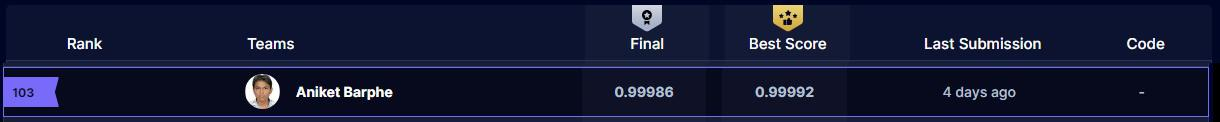

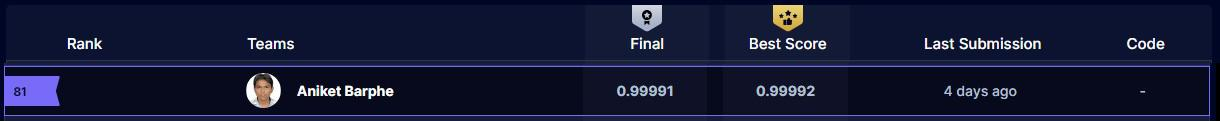

**Competition Link:-** https://machinehack.com/hackathons/analytics_olympiad_2023/leaderboard

**Rank Scored:-**

<span style="color:red"> **After 2nd Round** </span> 

**Top 50** out of **1016** registered participants

<span style="color:red">**After 1st Round** </span> 

a) **81** out of **1016** registered participants (Public Leaderboard)

b) **103** out of **1016** registered participants (Private Leaderboard)